# Türkiye için Küresel Enerji Değerlendirmesi

Enerji v

In [1]:
#!pip install plotnine         # 1. should be sufficient for most
#!pip install 'plotnine[all]'

In [2]:
# font sorunları için
# rebuild font cache https://stackoverflow.com/questions/37920935/matplotlib-cant-find-font-installed-in-my-linux-machine/70647041#70647041
# font install https://techoverflow.net/2024/01/29/how-to-fix-matplotlib-findfont-font-family-xkcd-not-found-on-ubuntu-22-04/
# brew install font-xkbcd

In [71]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings(action='once')
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
from plotnine import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd


In [72]:
import pandas as pd

In [73]:
#%matplotlib inline

-------------deneme bölgesi--------------

In [74]:
df=pd.read_csv("merged_narrow.csv")
df.drop(columns=['Region', 'SubRegion',"OPEC","EU","OECD","CIS","ISO3166_alpha3","ISO3166_numeric"], inplace=True)

In [75]:
ulkeler=["Turkiye","Total World","China","Germany"]
ilkyil=1965

In [76]:
olanlar=df[df.Country.isin(["Turkiye"]) & (df.Year>2022) & df.Var.isin(df.Var.unique())].Var.values

In [77]:
ds=df[df.Country.isin(ulkeler) & (df.Year>ilkyil) & (df.Var.isin(olanlar))]

In [78]:
dt=ds.pivot_table(index="Year",columns=["Country","Var"],values="Value")

In [79]:
for i in ulkeler:
      dt[i,"GDP"] = dt[i,"primary_ej"]/ dt[i,"primary_eintensity"]

In [80]:
dw=df[df.Country.isin(["Total World"]) & (df.Year>2022) & df.Var.isin(olanlar)]
dtr=df[df.Country.isin(["Turkiye"]) & (df.Year>2022) & df.Var.isin(olanlar)]

In [81]:
oranlar=100*dtr.Value.values/dw.Value.values

In [82]:
#kontrol
#pd.DataFrame([dw.Var.values,dtr.Var.values]).transpose()

In [83]:
#Dünyaya oranlar
pd.DataFrame([olanlar,oranlar]).transpose()

,0,1
0,biofuels_cons_ej,0.121079
1,biofuels_cons_kbd,0.110886
2,biogeo_ej,2.245751
3,biogeo_twh,2.493942
4,biogeo_twh_net,2.493942
5,co2_combust_mtco2,1.170236
6,co2_combust_pc,109.707838
7,co2_combust_per_ej,103.541906
8,co2_mtco2,1.131013
9,coalcons_ej,1.005375


In [84]:
for i in ulkeler:
      dt[i,"GDP"] = dt[i,"primary_ej"]/ dt[i,"primary_eintensity"]

In [85]:
plt.rcdefaults()
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')

#plt.xkcd()

#plt.figure(figsize=(12,6))
matplotlib.rcParams['figure.figsize'] = (10, 6)
plt.xkcd()

In [86]:
for i in olanlar:
  a=100*dt["Turkiye",i]/dt["Total World",i]
  print(i+" :  "+str(a.iloc[-1]))

biofuels_cons_ej :  0.1210786989930488
biofuels_cons_kbd :  0.11088609187041858
biogeo_ej :  2.2457507410412414
biogeo_twh :  2.493941828974655
biogeo_twh_net :  2.4939418288066957
co2_combust_mtco2 :  1.1702362173438405
co2_combust_pc :  109.70783766482235
co2_combust_per_ej :  103.54190556791494
co2_mtco2 :  1.1310128398287003
coalcons_ej :  1.0053745105595526
coalprod_ej :  0.32394915271526764
coalprod_mt :  0.7297150581148639
elect_twh :  1.0962424023656527
electbyfuel_coal :  1.1251885813712201
electbyfuel_gas :  1.0329460843959064
electbyfuel_hydro :  1.5059915357367175
electbyfuel_oil :  0.10096095585065816
electbyfuel_other :  0.5937967982652494
electbyfuel_ren_power :  1.5600839491615095
electbyfuel_total :  1.0962424023656527
gascons_bcfd :  1.20766207794942
gascons_bcm :  1.2076620776330942
gascons_ej :  1.2076621223252066
graphite_kt :  1.661248023099129
graphiteres_kt :  18.93547425672192
hydro_ej :  1.5059915384844422
hydro_twh :  1.5059915357367175
hydro_twh_net :  1.505

In [87]:
olanlar.transpose()

array(['biofuels_cons_ej', 'biofuels_cons_kbd', 'biogeo_ej', 'biogeo_twh',
       'biogeo_twh_net', 'co2_combust_mtco2', 'co2_combust_pc',
       'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej', 'coalprod_ej',
       'coalprod_mt', 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas',
       'electbyfuel_hydro', 'electbyfuel_oil', 'electbyfuel_other',
       'electbyfuel_ren_power', 'electbyfuel_total', 'gascons_bcfd',
       'gascons_bcm', 'gascons_ej', 'graphite_kt', 'graphiteres_kt',
       'hydro_ej', 'hydro_twh', 'hydro_twh_net', 'liqcons_kbd',
       'methane_process_mtco2', 'oilcons_ej', 'oilcons_kbd', 'oilcons_mt',
       'pop', 'primary_eintensity', 'primary_ej', 'primary_ej_pc',
       'refcap_kbd', 'refcaputil_pct', 'refthru_kbd', 'ren_power_ej',
       'ren_power_twh', 'ren_power_twh_net', 'renewables_ej', 'solar_ej',
       'solar_twh', 'solar_twh_net', 'wind_ej', 'wind_twh',
       'wind_twh_net'], dtype=object)

In [119]:
degiskenler_esg=['pop','GDP','primary_ej','elect_twh','co2_mtco2']
degiskenler_tpes=['primary_ej','oilcons_ej','gascons_ej','coalcons_ej','renewables_ej']
degiskenler_twh=['hydro_twh','wind_twh','solar_twh','ren_power_twh']
degiskenler_fosil=['electbyfuel_coal','electbyfuel_gas']
degiskenler_pc=['co2_combust_pc','primary_ej_pc','primary_eintensity']

trdegiskenler_esg=['Nüfus','GSYİH','Birincil Enerji','Elektrik','CO2 Emisyonları']
trdegiskenler_tpes=['Birincil Enerji','Petrol Tüketimi','Gaz Tüketimi','Kömür Tüketimi','Yenilenebilir Enerji-EJ']
trdegiskenler_twh=['Hidro-TWh','Rüzgar-TWh','Güneş-TWh','Yenilenebilir-TWh']
trdegiskenler_pc=['Kişibaşı Emisyon','Kişibaşı Birincil Enerji','Birincil Enerji Yoğunluğu']
trdegiskenler_fosil=['Elektrikte Kömür','Elektrikte Gaz']


In [120]:
trdegiskenler_esg = {degiskenler_esg[i]: trdegiskenler_esg[i] for i in range(len(degiskenler_esg))}
trdegiskenler_tpes = {degiskenler_tpes[i]: trdegiskenler_tpes[i] for i in range(len(degiskenler_tpes))}
trdegiskenler_twh = {degiskenler_twh[i]: trdegiskenler_twh[i] for i in range(len(degiskenler_twh))}
trdegiskenler_pc = {degiskenler_pc[i]: trdegiskenler_pc[i] for i in range(len(degiskenler_pc))}
trdegiskenler_fosil = {degiskenler_fosil[i]: trdegiskenler_fosil[i] for i in range(len(degiskenler_fosil))}

In [90]:
dt90=dt[dt.index>1996]
100*(dt["Turkiye"]/dt90["Total World"])["elect_twh"]

Year
1966         NaN
1967         NaN
1968         NaN
1969         NaN
1970         NaN
1971         NaN
1972         NaN
1973         NaN
1974         NaN
1975         NaN
1976         NaN
1977         NaN
1978         NaN
1979         NaN
1980         NaN
1981         NaN
1982         NaN
1983         NaN
1984         NaN
1985         NaN
1986         NaN
1987         NaN
1988         NaN
1989         NaN
1990         NaN
1991         NaN
1992         NaN
1993         NaN
1994         NaN
1995         NaN
1996         NaN
1997    0.731115
1998    0.765094
1999    0.780104
2000    0.802604
2001    0.776746
2002    0.791042
2003    0.830086
2004    0.849616
2005    0.877120
2006    0.919791
2007    0.954946
2008    0.970904
2009    0.960652
2010    0.978251
2011    1.029672
2012    1.048858
2013    1.023292
2014    1.046523
2015    1.076651
2016    1.098322
2017    1.155015
2018    1.138028
2019    1.119438
2020    1.134570
2021    1.172472
2022    1.125046
2023    1.096242
Name: ele

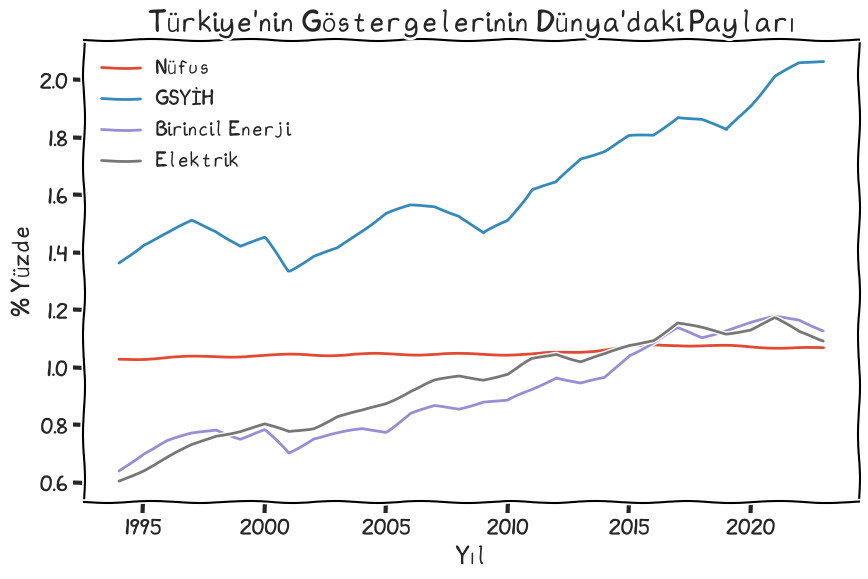

In [91]:
for t in degiskenler_esg:
    plt.plot(100*(dt["Turkiye",t]/dt["Total World",t])[-30:],label=trdegiskenler_esg[t])
plt.title("Türkiye'nin Göstergelerinin Dünya'daki Payları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()
plt.legend()

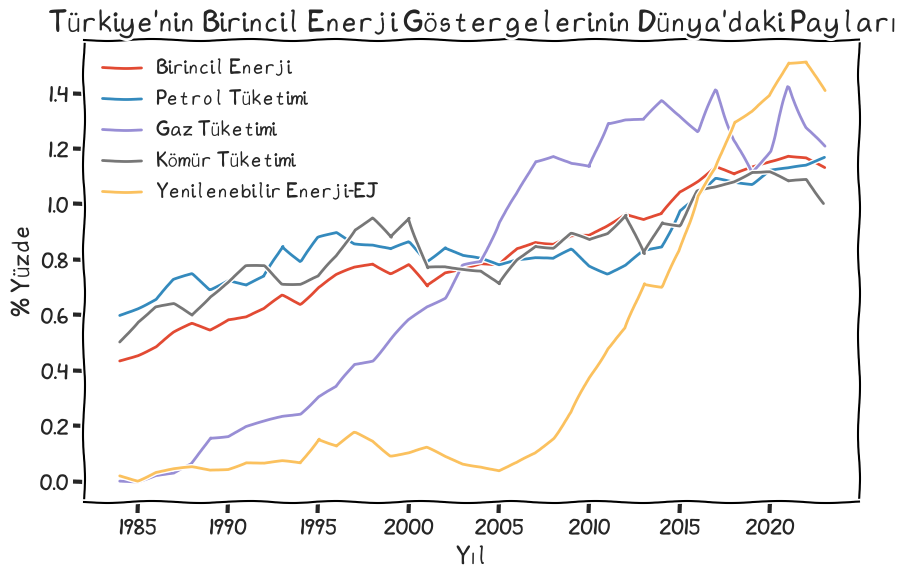

In [92]:
for t in degiskenler_tpes:
    plt.plot(100*(dt["Turkiye",t]/dt["Total World",t])[-40:],label=trdegiskenler_tpes[t])
plt.title("Türkiye'nin Birincil Enerji Göstergelerinin Dünya'daki Payları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()
plt.legend()

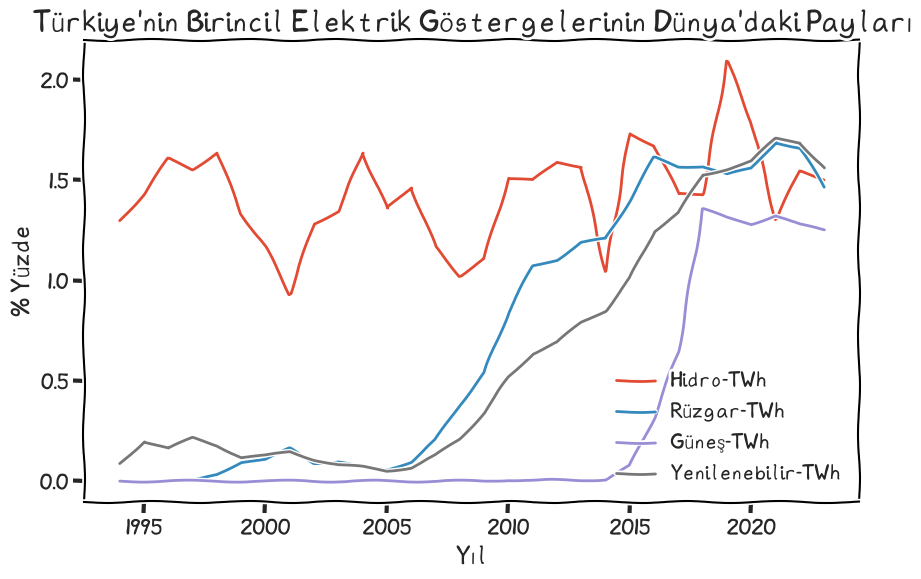

In [93]:
for t in degiskenler_twh:
    plt.plot(100*(dt["Turkiye",t]/dt["Total World",t])[-30:],label=trdegiskenler_twh[t])
plt.title("Türkiye'nin Birincil Elektrik Göstergelerinin Dünya'daki Payları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()
plt.legend()

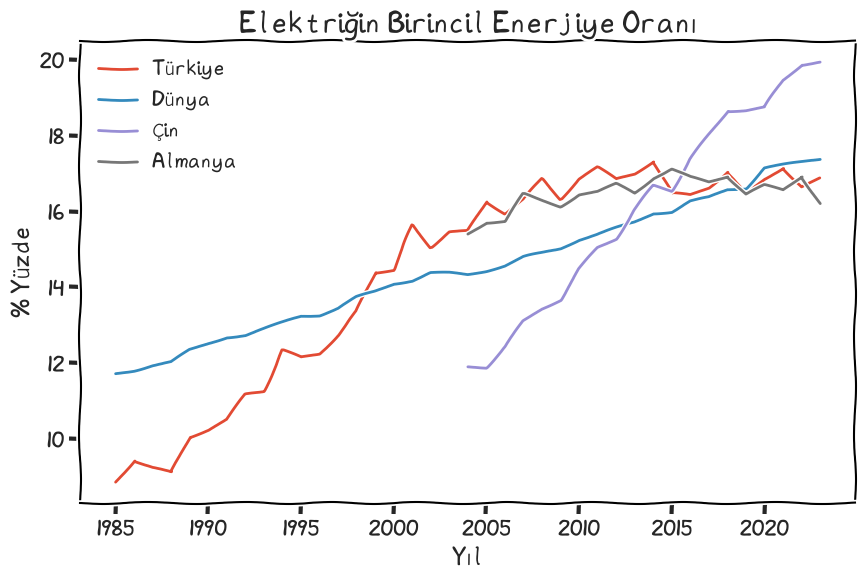

In [94]:
plt.plot(0.36*(dt["Turkiye","elect_twh"]/dt["Turkiye","primary_ej"])[-80:],label="Türkiye")
plt.plot(0.36*(dt["Total World","elect_twh"]/dt["Total World","primary_ej"])[-80:],label="Dünya")
plt.plot(0.36*(dt["China","elect_twh"]/dt["China","primary_ej"])[-20:],label="Çin")
plt.plot(0.36*(dt["Germany","elect_twh"]/dt["Germany","primary_ej"])[-20:],label="Almanya")


plt.title("Elektriğin Birincil Enerjiye Oranı")

plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

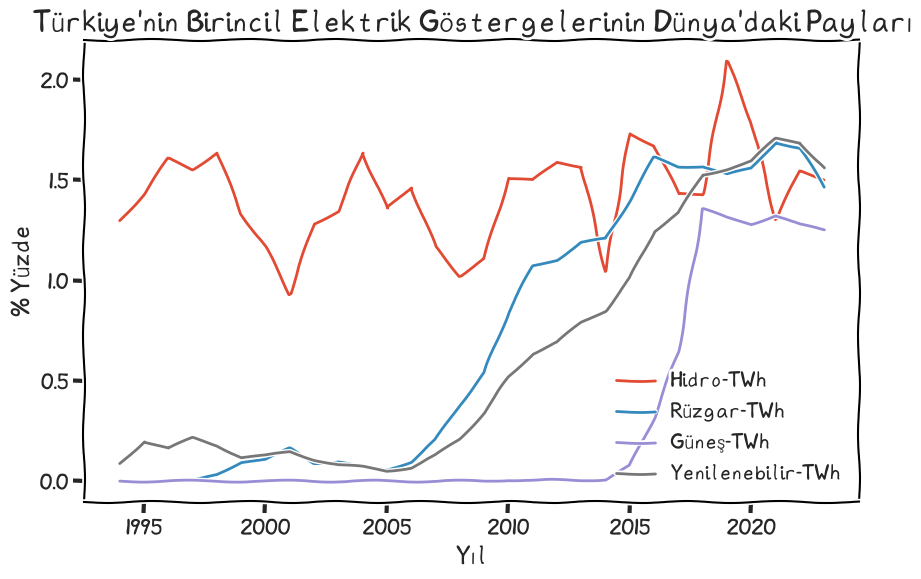

In [95]:
for t in degiskenler_twh:
    plt.plot(100*(dt["Turkiye",t]/dt["Total World",t])[-30:],label=trdegiskenler_twh[t])
plt.title("Türkiye'nin Birincil Elektrik Göstergelerinin Dünya'daki Payları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()
plt.legend()

Text(0, 0.5, '% Yüzde')

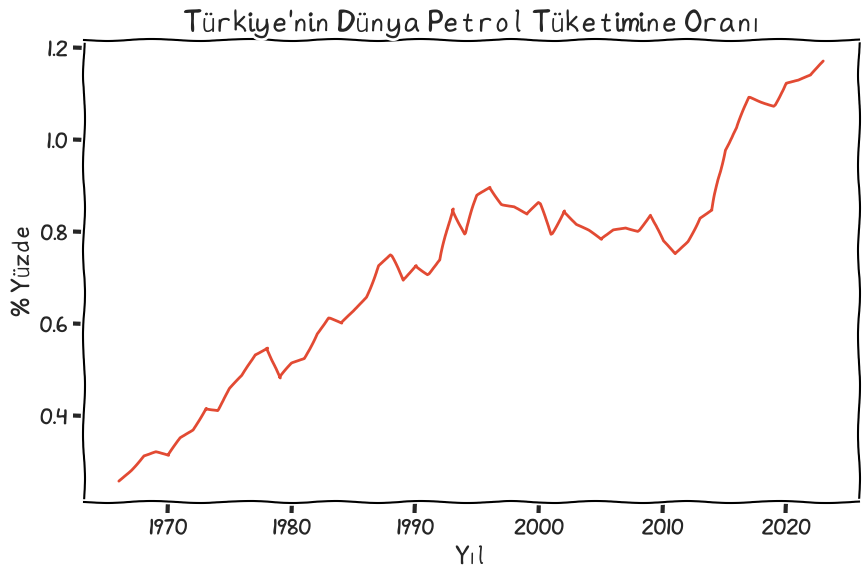

In [105]:
t="oilcons_ej"
plt.plot(100*(dt["Turkiye",t]/dt["Total World",t])[-70:],label=t)
plt.title("Türkiye'nin Dünya Petrol Tüketimine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
#plt.legend()
#plt.legend()

Text(0, 0.5, '% Yüzde')

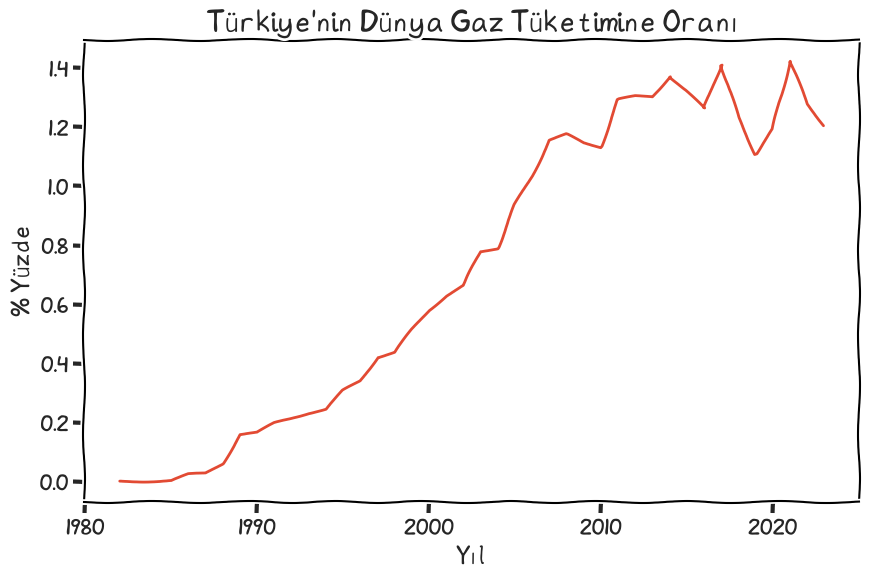

In [113]:
t="gascons_ej"
plt.plot(100*(dt["Turkiye",t]/dt["Total World",t])[-70:],label=t)
plt.title("Türkiye'nin Dünya Gaz Tüketimine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
#plt.legend()
#plt.legend()

Text(0, 0.5, '% Yüzde')

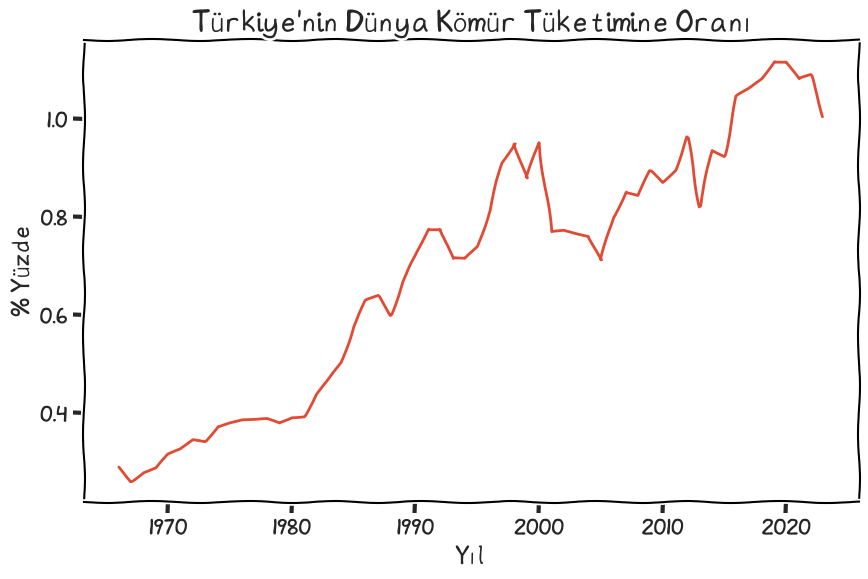

In [109]:
t="coalcons_ej"
plt.plot(100*(dt["Turkiye",t]/dt["Total World",t])[-70:],label=t)
plt.title("Türkiye'nin Dünya Kömür Tüketimine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
#plt.legend()
#plt.legend()

In [121]:
degiskenler_pc
degiskenler_esg

['pop', 'GDP', 'primary_ej', 'elect_twh', 'co2_mtco2']

co2_mtco2


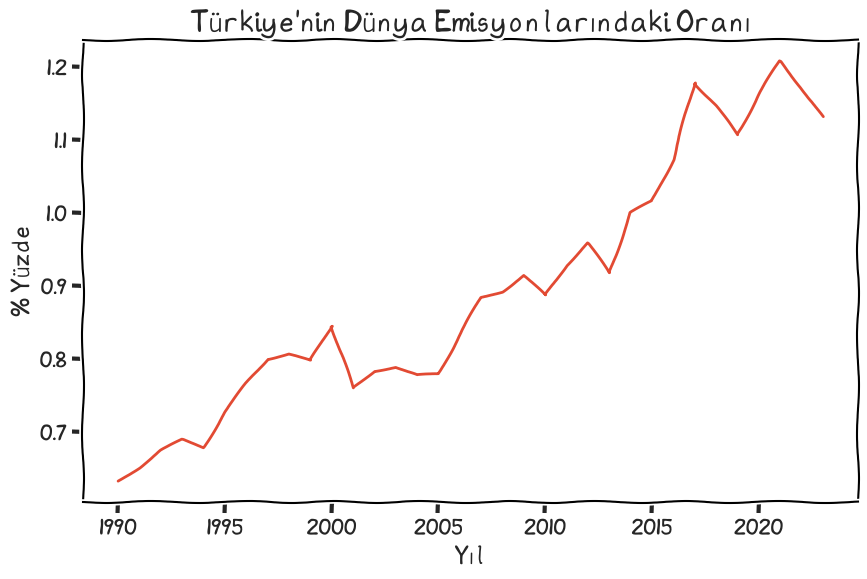

In [124]:
t=degiskenler_esg[4]
plt.plot(100*(dt["Turkiye",t]/dt["Total World",t])[-70:],label=t)
plt.title("Türkiye'nin Dünya Emisyonlarındaki Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
#plt.legend()
#plt.legend()
print(t)